# Individual Information
## Ram Saran Vuppuluri

### Introduction

Kaggle had initiated an industry-wide survey in 2017 that presents a truly comprehensive view of the state of data science and machine learning. In 2018, the study was live for a week in October and had collected responses from 23,859 individuals.

Data set used for the analysis is has 390+ columns. Not all columns are needed at any given point of the study. For this reason, the notebook is further divided into multiple subsections which will start with a business question, followed by data analysis. Only the columns that are related to the business question are extracted for analysis.

Furthermore, we are persisting extracted columns into separate csv files that are utilized for generating visualizations using Tableau for Medium blog post.

__One significant advantage with this approach is we are not ignoring the whole row if the respondent has not to answer specific questions. We are going to include all the answers (non-freeform) in the analysis.__

In this notebook, we will analyze the Individual information of survey takers. 

In [1]:
import gc

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
def generate_vertical_countplot(x, xlabel='', figName=None, figSize=(8, 6)):
    '''
    This method will generate vertical Seaborn countplot.

    :param x: x parameter

    :param xlabel: x axis label

    :param figName: file name by which it need to be stored.

    :param figSize: plot figure size.

    :return: None
    '''
    sns.set(rc={'figure.figsize': figSize})

    ax = sns.countplot(x=x)

    plt.xlabel(xlabel)
    if figName != None:
        ax.get_figure().savefig(figName)
    plt.show(ax);

In [3]:
def generate_horizontal_countplot(y, ylabel='', figName=None, figSize=(12, 10)):
    '''
    This method will generate horizontal Seaborn countplot/

    :param y: y parameter

    :param ylabel: y axis label

    :param figName: file name by which it need to be stored

    :param figSize: plot figure size.

    :return: None
    '''
    sns.set(rc={'figure.figsize': figSize})

    ax = sns.countplot(y=y)

    plt.ylabel(ylabel)

    if figName != None:
        ax.get_figure().savefig(figName)
    plt.show(ax);

In [4]:
multipleChoiceDF = pd.read_csv('../multipleChoiceResponses.csv',
                               low_memory=False)

### What is the gender, age and geographic distribution of survey respondents?

First three questions in the survey are related to gender, age, and country of residence of the survey takers.

We will start by creating a new Pandas Data Frame with only necessary columns.

In [5]:
demographicsColumns = ['Q1','Q2','Q3']

In [6]:
demographicsDF = multipleChoiceDF[demographicsColumns]

Now that we have the dataframe, we will inspect the tidiness of the data frame.

In [7]:
demographicsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23860 entries, 0 to 23859
Data columns (total 3 columns):
Q1    23860 non-null object
Q2    23860 non-null object
Q3    23860 non-null object
dtypes: object(3)
memory usage: 559.3+ KB


In [8]:
demographicsDF.head()

,Q1,Q2,Q3
0,What is your gender? - Selected Choice,What is your age (# years)?,In which country do you currently reside?
1,Female,45-49,United States of America
2,Male,30-34,Indonesia
3,Female,30-34,United States of America
4,Male,35-39,United States of America


From the visual and programmatic analysis:
* There are no missing rows
* All columns are loaded with the correct data type.
* Row with ID 0, is the same as the question. We will drop this row from the analysis as it does not have any empirical value.

In [9]:
demographicsDF.drop([0],inplace=True)
demographicsDF.reset_index(drop=True,inplace=True)

In [10]:
demographicsDF.head()

,Q1,Q2,Q3
0,Female,45-49,United States of America
1,Male,30-34,Indonesia
2,Female,30-34,United States of America
3,Male,35-39,United States of America
4,Male,22-24,India


There are no more issues with data, we can proceed with the analysis of data.

__Two-thirds of the survey takers have identified themselves as Male.__

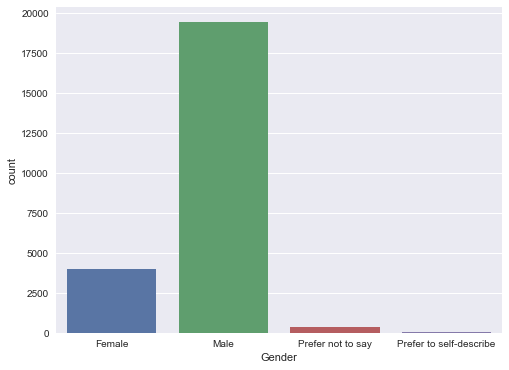

In [11]:
generate_vertical_countplot(x=demographicsDF.Q1,
                            xlabel="Gender",
                            figName='Gender_Distribution.jpeg')

__Adults across all age groups are represented. Almost half of the survey respondents are under 30 years of age.__

In [12]:
demographicsDF.sort_values("Q2",inplace=True)
demographicsDF.reset_index(drop=True,inplace=True)

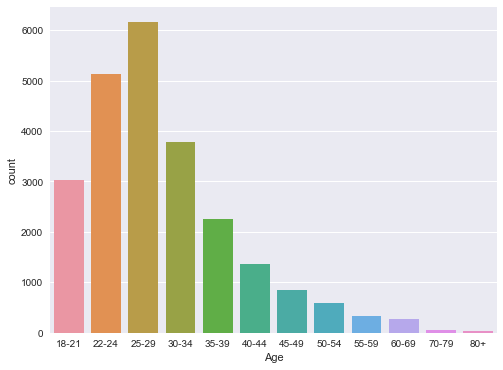

In [13]:
generate_vertical_countplot(x=demographicsDF.Q2,
                            xlabel="Age",
                            figName='Age_Distribution.jpeg')

__Individuals from 147 countries and territories have participated in the survey, approximately a third of the survey takers are from U.S. and India.__

In [14]:
demographicsDF.sort_values("Q3",inplace=True)
demographicsDF.reset_index(drop=True,inplace=True)

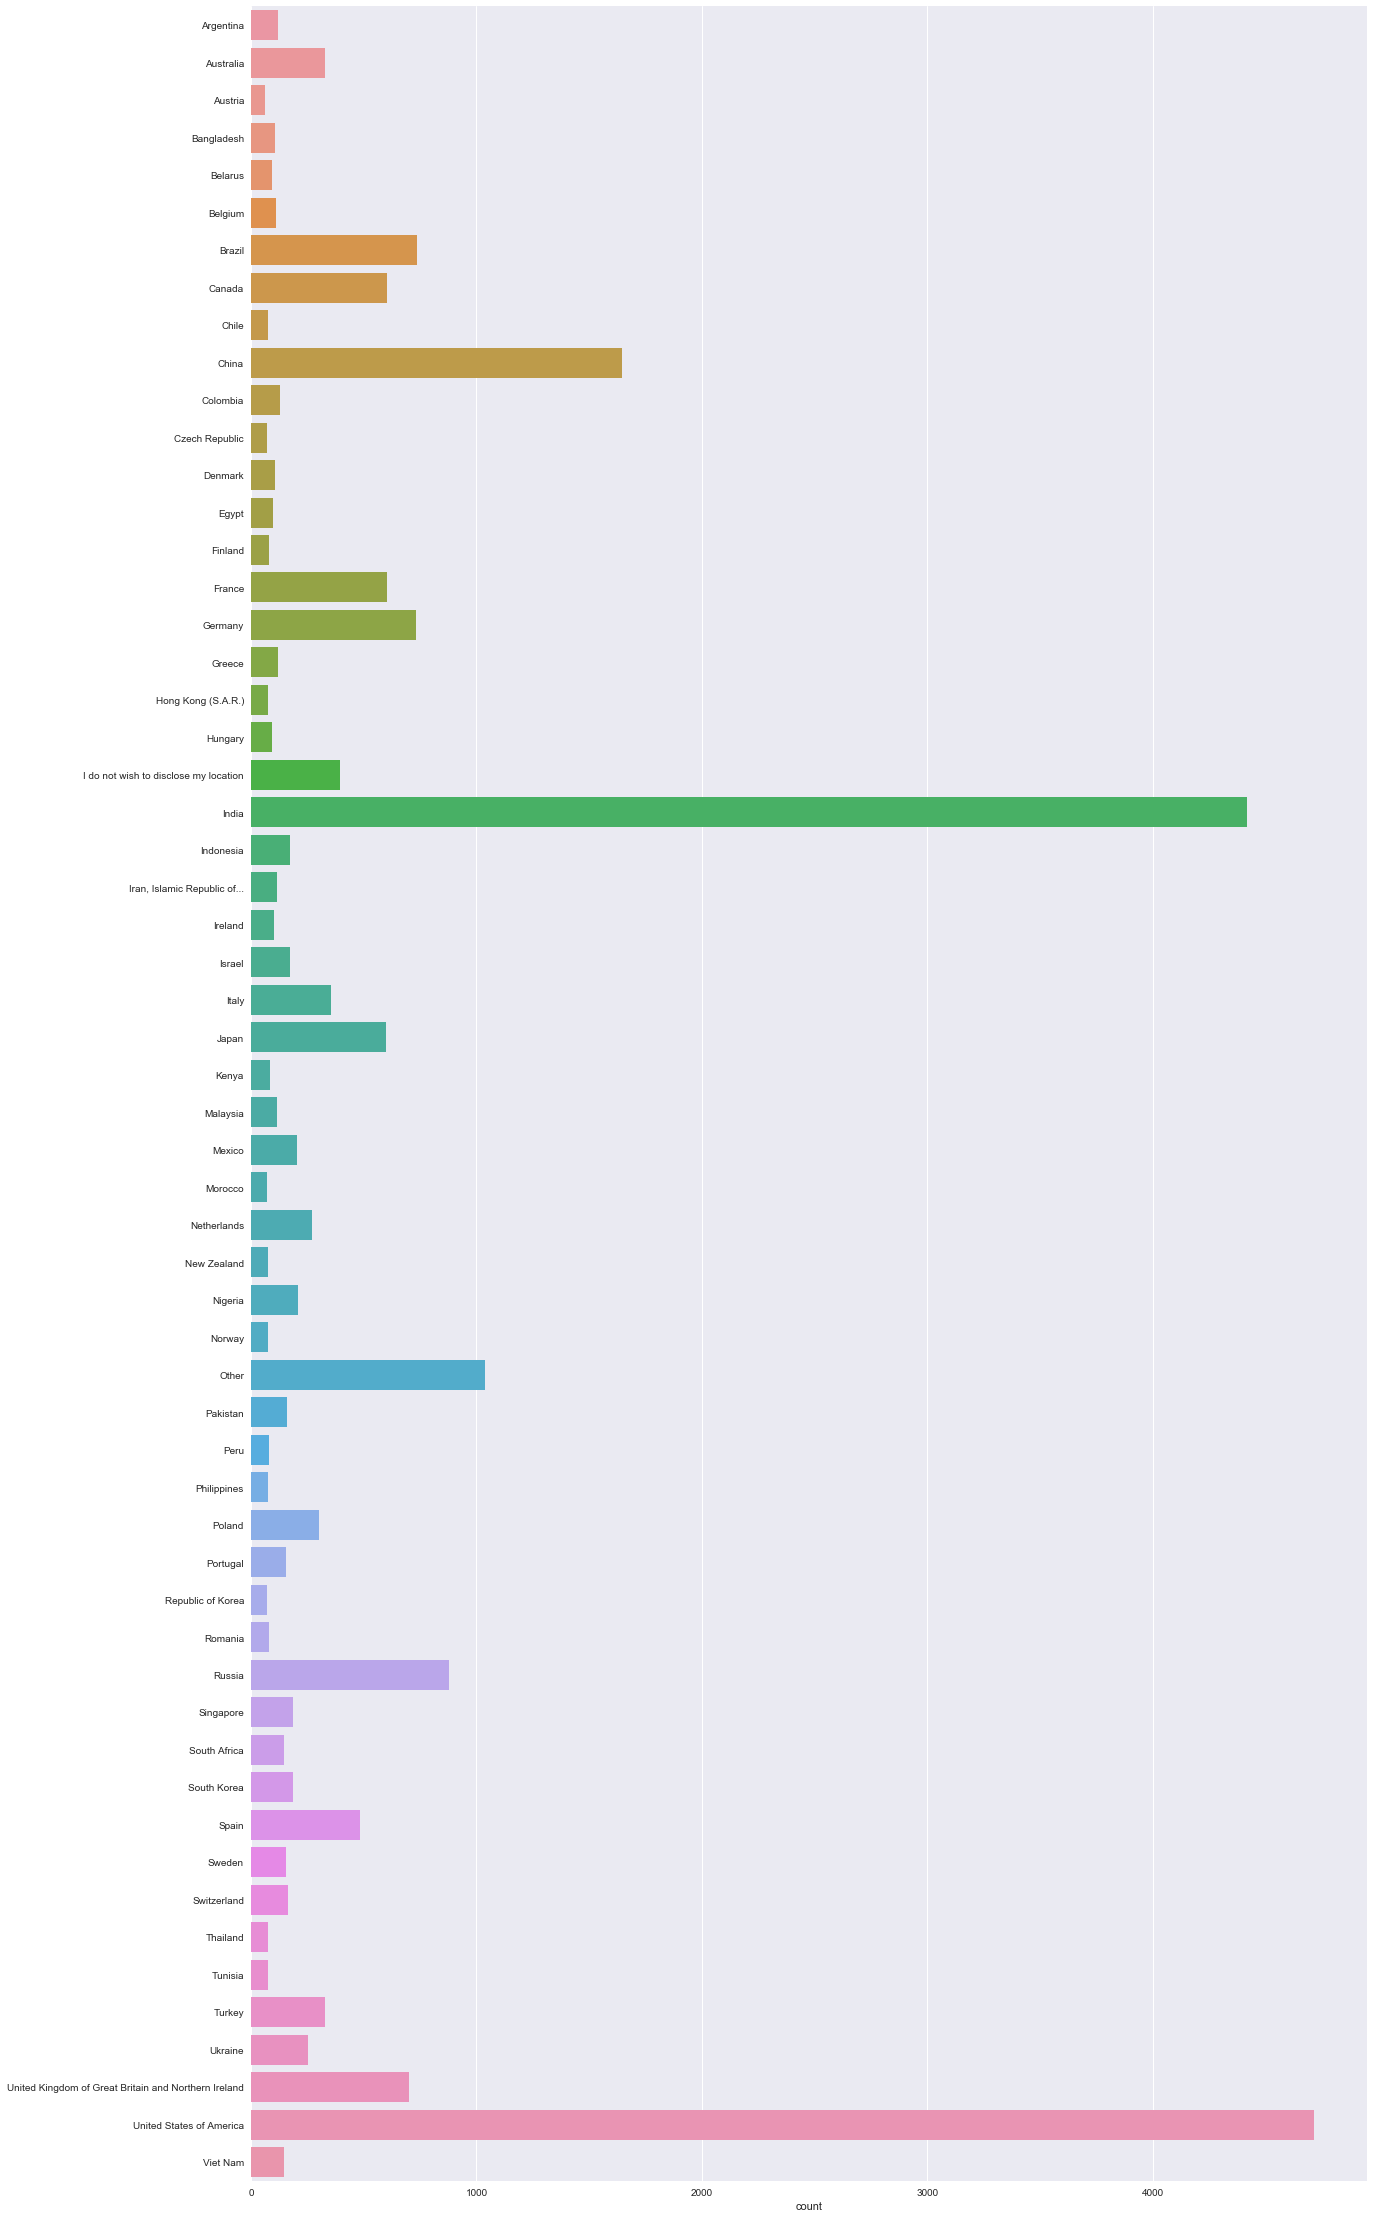

In [15]:
generate_horizontal_countplot(y=demographicsDF.Q3,
                             figSize = (20,40))

We will persist the clean copy of the dataframe as a CSV file. This CSV file is utilized by Tableau to generate visualizations for Medium blog post.

In [16]:
demographicsDF.rename(columns={"Q1":"Gender",
                               "Q2":"Age",
                               "Q3":"Country"},inplace=True)

In [17]:
demographicsDF.columns

Index(['Gender', 'Age', 'Country'], dtype='object')

In [18]:
demographicsDF.to_csv("demographics.csv",index=False)

We no longer need "demographicsDF" in the analysis. We will clean up from memory.

In [19]:
del demographicsDF
gc.collect()

12

### What percent of the time is spent actively coding at work or school?

In [20]:
codeTimeDF = pd.DataFrame(multipleChoiceDF.Q23)

In [21]:
codeTimeDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23860 entries, 0 to 23859
Data columns (total 1 columns):
Q23    18548 non-null object
dtypes: object(1)
memory usage: 186.5+ KB


In [22]:
codeTimeDF.head()

,Q23
0,Approximately what percent of your time at wor...
1,0% of my time
2,1% to 25% of my time
3,75% to 99% of my time
4,50% to 74% of my time


From the visual and programmatic analysis:
* There are rows with missing data, we will not include these records in our report.
* All columns are loaded with the correct data type.
* Row with ID 0, is the same as the question. We will drop this row from the analysis as it does not have any empirical value.

In [23]:
codeTimeDF.drop([0],inplace=True)
codeTimeDF.dropna(inplace=True)
codeTimeDF.reset_index(drop=True,inplace=True)

__Almost all of the survey respondents have some coding activity involved at work.__

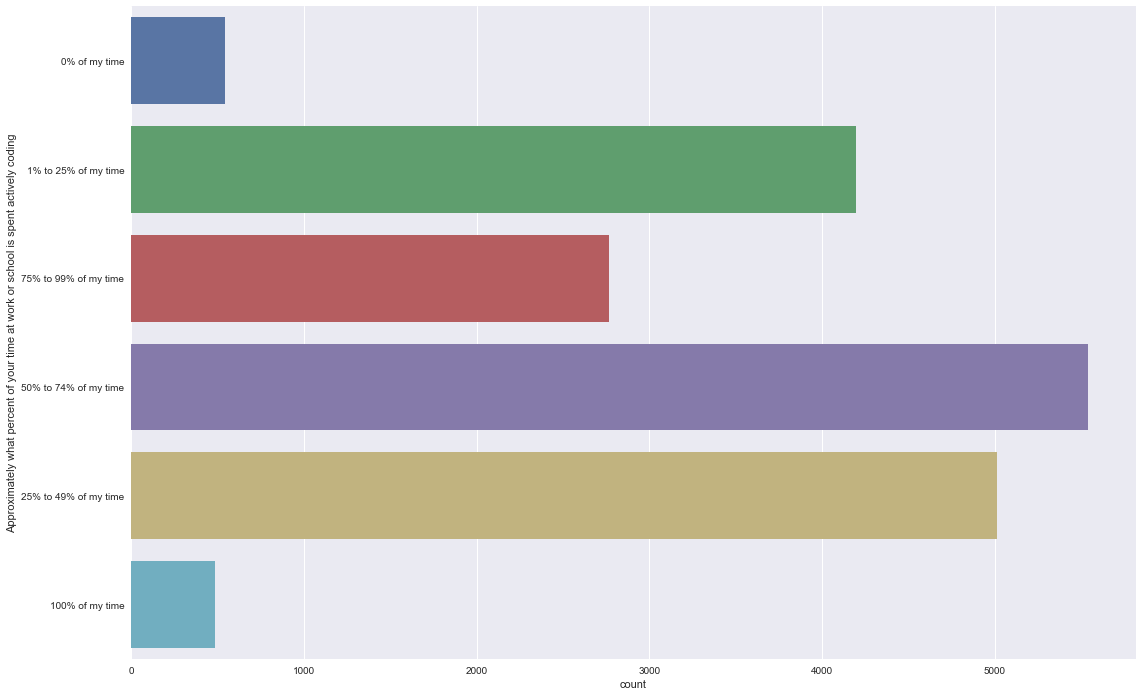

In [24]:
generate_horizontal_countplot(y=codeTimeDF.Q23,
                             figSize=(18,12),
                             ylabel = 'Approximately what percent of your time at work or school is spent actively coding',
                             figName = 'code_Time.jpeg')

We will persist the clean copy of the dataframe as a CSV file. 

We no longer need "codeTimeDF" in the analysis. We will clean up from memory.

In [25]:
codeTimeDF.to_csv('codeTime.csv',index=False)

In [26]:
del codeTimeDF
gc.collect()

2471

### How long have you been writing code to analyze data?

In [27]:
howLongCodeDF = pd.DataFrame(multipleChoiceDF.Q24)

In [28]:
howLongCodeDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23860 entries, 0 to 23859
Data columns (total 1 columns):
Q24    18534 non-null object
dtypes: object(1)
memory usage: 186.5+ KB


In [29]:
howLongCodeDF.head()

,Q24
0,How long have you been writing code to analyze...
1,I have never written code but I want to learn
2,I have never written code but I want to learn
3,5-10 years
4,5-10 years


From the visual and programmatic analysis:
* There are rows with missing data, we will not include these records in our report.
* All columns are loaded with the correct data type.
* Row with ID 0, is the same as the question. We will drop this row from the analysis as it does not have any empirical value.

In [30]:
howLongCodeDF.drop([0],inplace=True)
howLongCodeDF.dropna(inplace=True)
howLongCodeDF.reset_index(drop=True,inplace=True)

__When it comes to experience, the majority of the survey takers have less than 5 years of coding experience.__

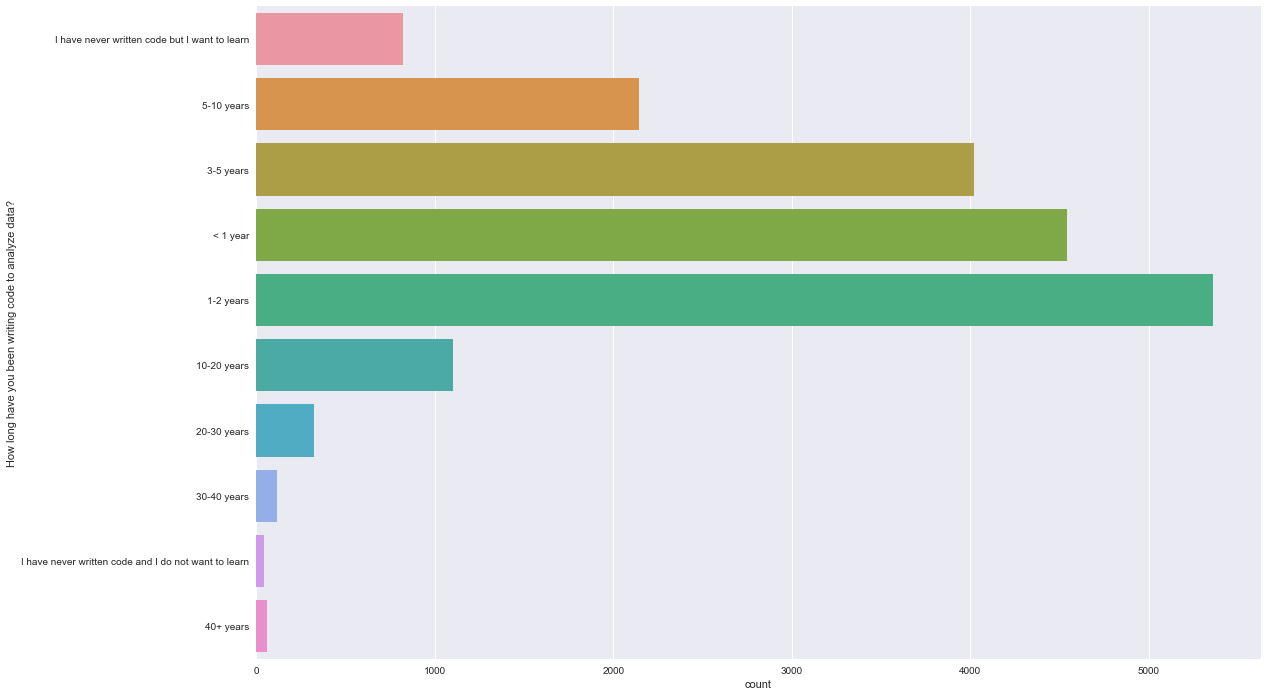

In [31]:
generate_horizontal_countplot(y=howLongCodeDF.Q24,
                             figSize=(18,12),
                             ylabel = 'How long have you been writing code to analyze data?',
                             figName = 'code_experience.jpeg')

We will persist the clean copy of the dataframe as a CSV file.

We no longer need "howLongCodeDF" in the analysis. We will clean up from memory.

In [32]:
howLongCodeDF.to_csv('code_experience.csv',index=False)

In [33]:
del howLongCodeDF
gc.collect()

2923

### For how many years have you used machine learning methods (at work or in school)?

In [34]:
machineLearningExpDF = pd.DataFrame(multipleChoiceDF.Q25)

In [35]:
machineLearningExpDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23860 entries, 0 to 23859
Data columns (total 1 columns):
Q25    18492 non-null object
dtypes: object(1)
memory usage: 186.5+ KB


In [36]:
machineLearningExpDF.head()

,Q25
0,For how many years have you used machine learn...
1,I have never studied machine learning but plan...
2,I have never studied machine learning but plan...
3,< 1 year
4,4-5 years


From the visual and programmatic analysis:
* There are rows with missing data, we will not include these records in our report.
* All columns are loaded with the correct data type.
* Row with ID 0, is the same as the question. We will drop this row from the analysis as it does not have any empirical value.

In [37]:
machineLearningExpDF.drop([0],inplace=True)
machineLearningExpDF.dropna(inplace=True)
machineLearningExpDF.reset_index(drop=True,inplace=True)

__When it comes to experience, the majority of the survey takers have less than 3 years of Machine Learning experience.__

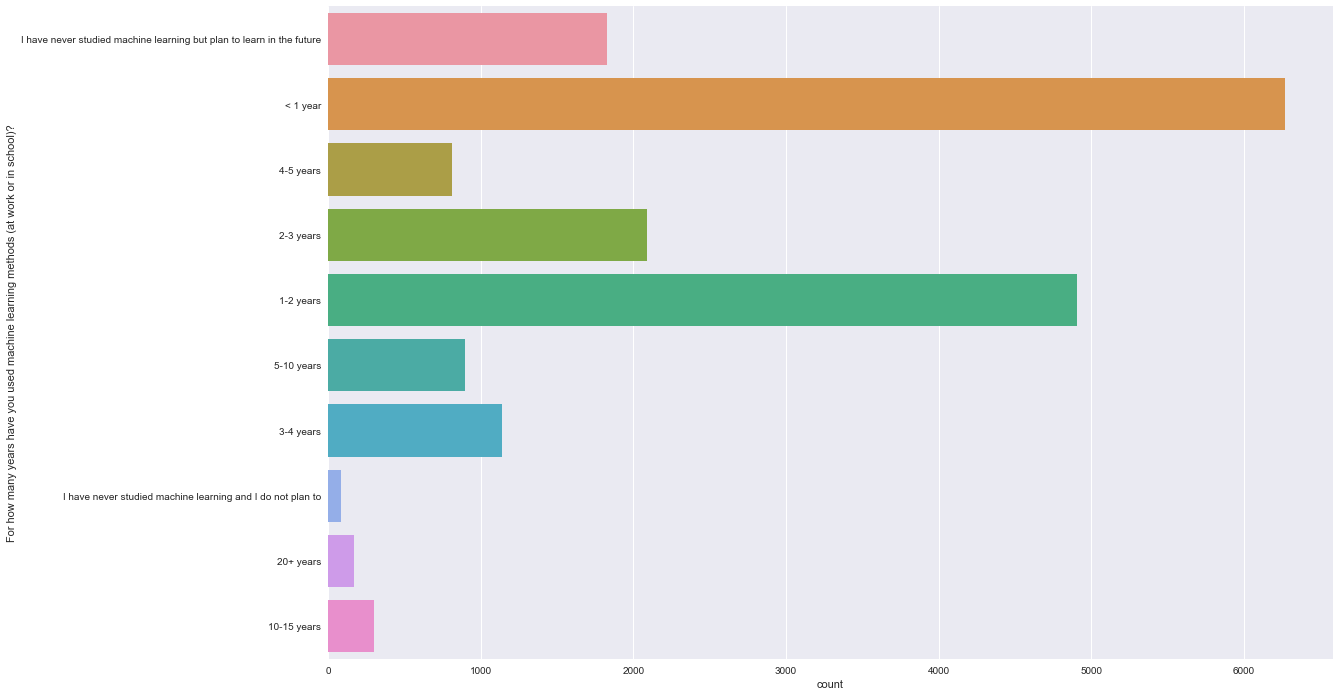

In [38]:
generate_horizontal_countplot(y=machineLearningExpDF.Q25,
                             figSize=(18,12),
                             ylabel = 'For how many years have you used machine learning methods (at work or in school)?',
                             figName = 'machine_Learning_experience.jpeg')

We will persist the clean copy of the dataframe as a CSV file. 

We no longer need "machineLearningExpDF" in the analysis. We will clean up from memory.

In [39]:
machineLearningExpDF.to_csv('machineLearningExp.csv',index=False)

In [40]:
del machineLearningExpDF
gc.collect()

2989

### Do you consider yourself to be a data scientist?

In [41]:
ruDataScientistDF = pd.DataFrame(multipleChoiceDF.Q26)

In [42]:
ruDataScientistDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23860 entries, 0 to 23859
Data columns (total 1 columns):
Q26    18481 non-null object
dtypes: object(1)
memory usage: 186.5+ KB


In [43]:
ruDataScientistDF.head()

,Q26
0,Do you consider yourself to be a data scientist?
1,Maybe
2,Definitely not
3,Definitely yes
4,Probably yes


From the visual and programmatic analysis:
* There are rows with missing data, we will not include these records in our report.
* All columns are loaded with the correct data type.
* Row with ID 0, is the same as the question. We will drop this row from the analysis as it does not have any empirical value.

In [44]:
ruDataScientistDF.drop([0],inplace=True)
ruDataScientistDF.dropna(inplace=True)
ruDataScientistDF.reset_index(drop=True,inplace=True)

__When asked if the respondents consider themselves as Data Scientists, more than half of the respondents answered yes.__

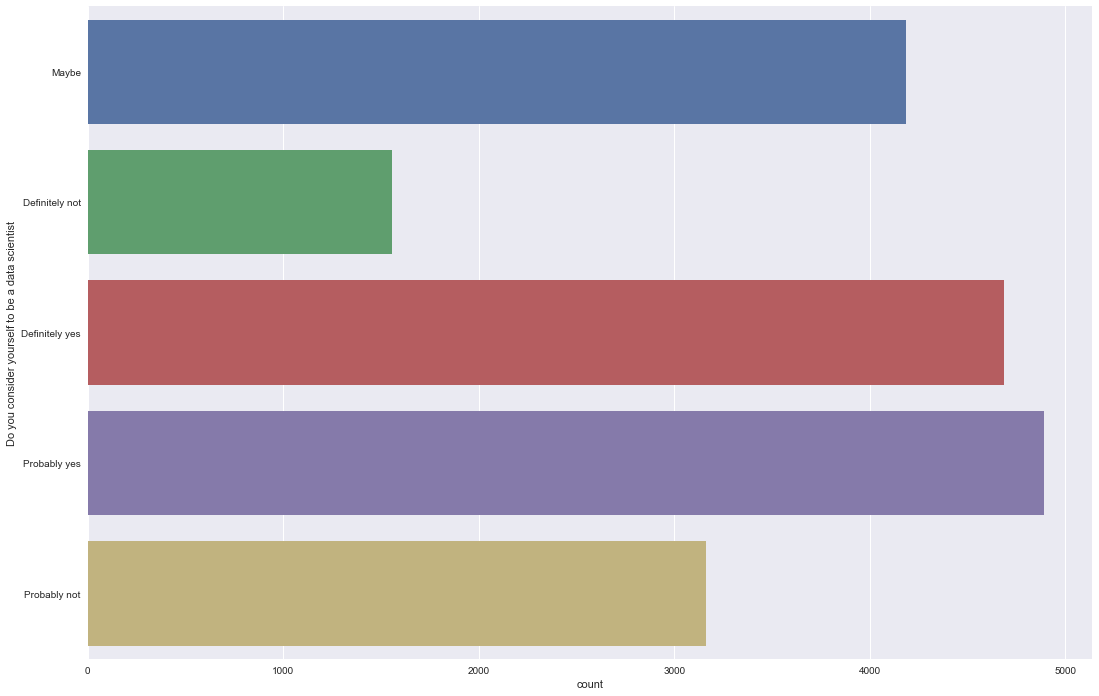

In [45]:
generate_horizontal_countplot(y=ruDataScientistDF.Q26,
                             figSize=(18,12),
                             ylabel = 'Do you consider yourself to be a data scientist',
                             figName = 'Data_Scientist.jpeg')

We will persist the clean copy of the dataframe as a CSV file. 

We no longer need "ruDataScientistDF" in the analysis. We will clean up from memory.

In [46]:
ruDataScientistDF.to_csv('DataScientist.csv',index=False)

In [47]:
del ruDataScientistDF
gc.collect()

2360

At this point of analysis, we have individually persisted machine learning and coding experience. We will save both together as one single CSV file.

We will retrace the same steps as before. In the end, we will persist the clean copy of the dataframe as a CSV file. 

In [48]:
experiencDF = multipleChoiceDF[['Q24','Q25']]

In [49]:
experiencDF.head()

,Q24,Q25
0,How long have you been writing code to analyze...,For how many years have you used machine learn...
1,I have never written code but I want to learn,I have never studied machine learning but plan...
2,I have never written code but I want to learn,I have never studied machine learning but plan...
3,5-10 years,< 1 year
4,5-10 years,4-5 years


In [50]:
experiencDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23860 entries, 0 to 23859
Data columns (total 2 columns):
Q24    18534 non-null object
Q25    18492 non-null object
dtypes: object(2)
memory usage: 372.9+ KB


In [51]:
experiencDF.drop([0],inplace=True)
experiencDF.reset_index(drop=True,inplace=True)

In [52]:
experiencDF.head()

,Q24,Q25
0,I have never written code but I want to learn,I have never studied machine learning but plan...
1,I have never written code but I want to learn,I have never studied machine learning but plan...
2,5-10 years,< 1 year
3,5-10 years,4-5 years
4,5-10 years,2-3 years


In [53]:
experiencDF = pd.melt(experiencDF)

In [54]:
experiencDF.head()

,variable,value
0,Q24,I have never written code but I want to learn
1,Q24,I have never written code but I want to learn
2,Q24,5-10 years
3,Q24,5-10 years
4,Q24,5-10 years


In [55]:
experiencDF.variable.replace(to_replace='Q24',value='Coding Experience',inplace=True)
experiencDF.variable.replace(to_replace='Q25',value='Machine Leaning Experience',inplace=True)

In [56]:
experiencDF.head()

,variable,value
0,Coding Experience,I have never written code but I want to learn
1,Coding Experience,I have never written code but I want to learn
2,Coding Experience,5-10 years
3,Coding Experience,5-10 years
4,Coding Experience,5-10 years


In [57]:
experiencDF.value.value_counts()

< 1 year                                                                 10813
1-2 years                                                                10267
3-5 years                                                                 4023
5-10 years                                                                3040
2-3 years                                                                 2088
I have never studied machine learning but plan to learn in the future     1828
3-4 years                                                                 1140
10-20 years                                                               1102
I have never written code but I want to learn                              821
4-5 years                                                                  810
20-30 years                                                                321
10-15 years                                                                298
20+ years                                           

In [58]:
experiencDF.value.replace(to_replace='I have never studied machine learning but plan to learn in the future',
                          value = 'I have never but I want to learn in the future',inplace = True)
experiencDF.value.replace(to_replace='I have never written code but I want to learn',
                          value = 'I have never but I want to learn in the future',inplace = True)
experiencDF.value.replace(to_replace='I have never studied machine learning and I do not plan to',
                          value = 'I have never and I do not plan to ',inplace = True)
experiencDF.value.replace(to_replace='I have never written code and I do not want to learn',
                          value = 'I have never and I do not plan to ',inplace = True)

In [59]:
experiencDF.value.value_counts()

< 1 year                                          10813
1-2 years                                         10267
3-5 years                                          4023
5-10 years                                         3040
I have never but I want to learn in the future     2649
2-3 years                                          2088
3-4 years                                          1140
10-20 years                                        1102
4-5 years                                           810
20-30 years                                         321
10-15 years                                         298
20+ years                                           167
I have never and I do not plan to                   127
30-40 years                                         117
40+ years                                            62
Name: value, dtype: int64

In [60]:
experiencDF.to_csv('experienc.csv',index=False)

### Conclusion

In this notebook, we have analyzed gender, age, geographic distributions of survey takers along with basic questions like do they consider themselves as Data Scientist or not? How long are they coding? How much machine learning experience they have.